In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
import scipy.stats as stats
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('diabetic_data.csv')
df1 = df.copy()

In [4]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Feature selection

In [ ]:
### reason for selecting variables here

In [4]:
features = ['age','race','insulin','gender','max_glu_serum', 'readmitted']
df_selected_features = df1[features]

In [72]:
for i in df_selected_features.columns:
    print()
    print(i + ':')
    print()
    print(df_selected_features[i].value_counts())


age:

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

race:

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

diag_1:

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
V43       1
133       1
903       1
365       1
605       1
Name: diag_1, Length: 717, dtype: int64

gender:

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

number_inpatient:

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64


In [5]:
# Convert categorical features to numerical
obj_df = df_selected_features.select_dtypes(include=['object']).copy()
obj_df = obj_df.astype('category')

for i in obj_df.columns:
    obj_df[i] = obj_df[i].cat.codes

obj_df.head(3)

,age,race,insulin,gender,max_glu_serum,readmitted
0,0,3,1,0,2,2
1,1,3,3,0,2,1
2,2,1,1,0,2,2


# EDA

In [31]:
# function for bar plot
def bar_plot(df, variable, ylabel, xlabel, title):    
    plt.figure(figsize = (10,6))
    (df[variable].value_counts().sort_index()/len(df)).plot(kind='bar')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

### Bar graphs

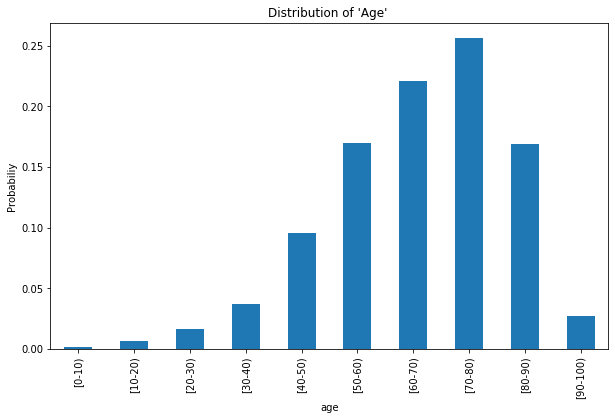

In [32]:
bar_plot(df_selected_features, "age", "Probabiliy", "age", "Distribution of 'Age' ")

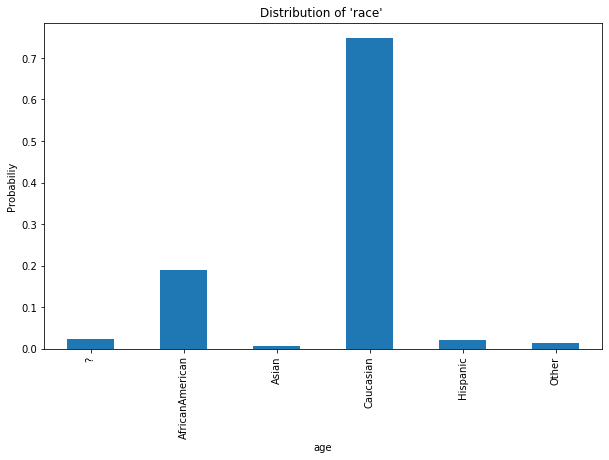

In [33]:
bar_plot(df_selected_features, "race", "Probabiliy", "age", "Distribution of 'race' ")

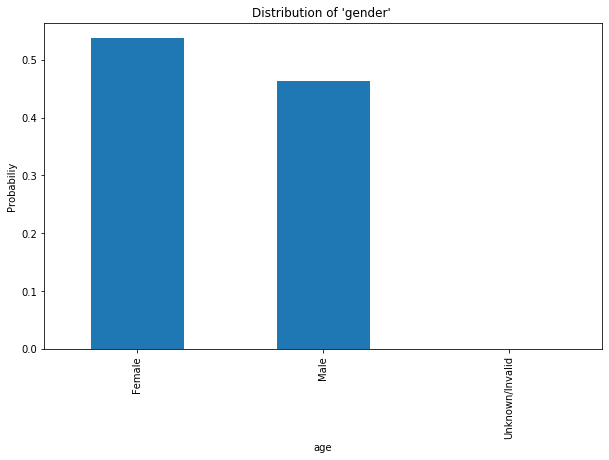

In [34]:
bar_plot(df_selected_features, "gender", "Probabiliy", "age", "Distribution of 'gender' ")

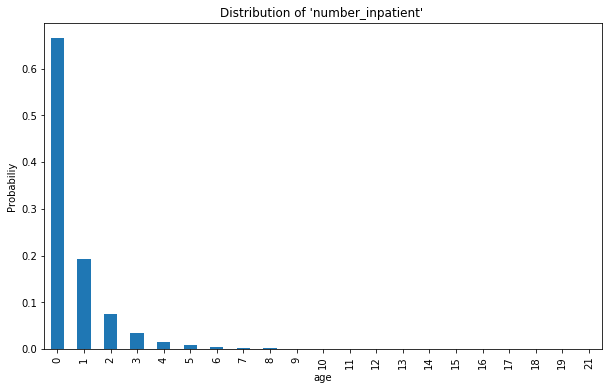

In [35]:
bar_plot(df_selected_features, "number_inpatient", "Probabiliy", "age", "Distribution of 'number_inpatient' ")

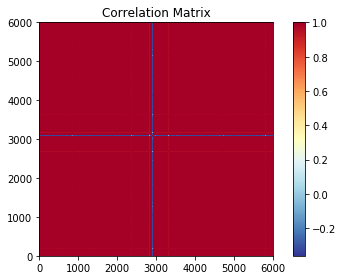

In [69]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(obj_df.iloc[:6000,:])
smg.plot_corr(corr_matrix)
plt.show()

In [9]:
df_selected_features

,age,race,diag_1,gender,number_inpatient
0,[0-10),Caucasian,250.83,Female,0
1,[10-20),Caucasian,276,Female,0
2,[20-30),AfricanAmerican,648,Female,1
3,[30-40),Caucasian,8,Male,0
4,[40-50),Caucasian,197,Male,0
...,...,...,...,...,...
101761,[70-80),AfricanAmerican,250.13,Male,0
101762,[80-90),AfricanAmerican,560,Female,1
101763,[70-80),Caucasian,38,Male,0
101764,[80-90),Caucasian,996,Female,1


###### Correlation heatmap

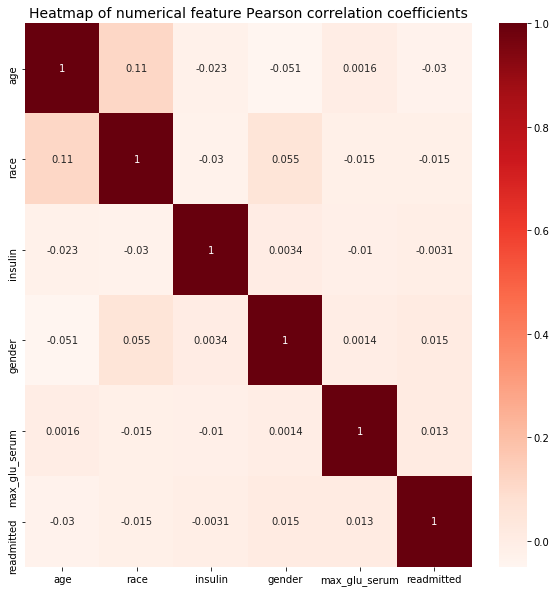

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = obj_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap of numerical feature Pearson correlation coefficients', size=14)
plt.show()

###### Independence of variables

The Chi-Square test is performed to evaluate the independence of the selected variables. The chosen significant level is 0.05 and the p-value generated is compared to this value to establish the dependence between the variables.

In [82]:
#'age','race','insulin','gender','max_glu_serum'
ct = pd.crosstab(obj_df['insulin'],obj_df['age'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [83]:
ct = pd.crosstab(obj_df['insulin'],obj_df['race'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [85]:
ct = pd.crosstab(obj_df['max_glu_serum'],obj_df['insulin'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [86]:
ct = pd.crosstab(obj_df['insulin'],obj_df['gender'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are not associated


In [87]:
ct = pd.crosstab(obj_df['race'],obj_df['gender'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [88]:
ct = pd.crosstab(obj_df['race'],obj_df['age'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [89]:
ct = pd.crosstab(obj_df['race'],obj_df['max_glu_serum'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [90]:
ct = pd.crosstab(obj_df['age'],obj_df['max_glu_serum'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


In [91]:
ct = pd.crosstab(obj_df['gender'],obj_df['max_glu_serum'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are not associated


In [92]:
ct = pd.crosstab(obj_df['age'],obj_df['gender'])
#print(ct)
stat, p, dof, expected = stats.chi2_contingency(ct)
alpha = 0.05
#print(stat,p,dof,expected)
if p <= alpha:
    print('Variables are associated')
else:
    print('Variables are not associated')

Variables are associated


###### Llinear Separability

In [ ]:
Y = obj_df['readmitted']
X = obj_df.drop(['readmitted'], axis =1)
X = pd.get_dummies(X)

In [98]:
#check linearity using  SVM
#X_train, X_test, y_train, y_test = train_test_split(obj_df.loc[:, obj_df.columns != 'readmitted'], obj_df['readmitted'], stratify=obj_df['readmitted'],test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)
clf = SVC()
scaler = StandardScaler()
clf.fit(scaler.fit_transform(X_train), y_train)
print('Accuracy of the SVM model is :', clf.score(scaler.transform(X_test), y_test))

Accuracy of the SVM model is : 0.5361485739553393


In [97]:
#Logistic Regression check for linearity
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=123)
logistic = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logistic.fit(X_train, Y_train)
Y_log = logistic.predict(X_test)
print(" The accuracy of the Logistic regression model:" ,logistic.score(X_test, Y_test))

 The accuracy of the Logistic regression model: 0.5358537843614121


###### Dimensionality Reduction

The Dimensionality Reduction method that would be used is PCA because the variables are inherently inter-dependent.From the Chi test performed above , most of the features are dependent on each other.The labels are pretty much linearly separable but the decision boundary is a bit blur hence why the classification model was performing somewhat poorly with accuracies of 53%.The correlation heatmap exposed the fact that most of the features are not strongly correlated with each other.Collinearity in the variables tends to inflate the variance of at least one estimated regression leading to less model interpretability. In this case ,principal component analysis would beuseful as a means of filtering out noise from the dataset.

Principal component analysis is an unsupervised technique that transforms the coordinate system so that all features are orthogonal and axes are ranked in order of how much variance they account for.It maximises variance through linear combinations of correlated features, providing X, orthogonal PCs while transforming data into a lower dimensional space.
The information contained in a feature is the amount of variance it contains, or can explain.The important aspect in PCA is  that the variables in each linear combination are correlated with each other.This can be seen in the correlation heatmap presented above.If we can find a subset of features that contain most of the variance, we can capture most of the underlying information even after discarding the other features.PCA will essentially look for a linear combination of variables able to explain the most variance in the dataset.

